<a href="https://colab.research.google.com/github/juliannadesalle/ECGR-5106-Real-Time-Machine-Learning/blob/main/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Files already downloaded and verified
Files already downloaded and verified


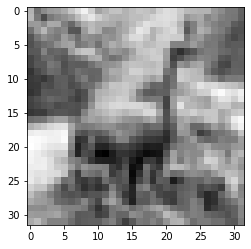

In [2]:
#import necessary libraries and utilities
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import collections

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)
#define class names in the dataset
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
#setup dataset for training
from torchvision import datasets, transforms
data_path = '../data-unversioned/p1ch6/'

#transform the data to a tensor and normalize in order to be used in the model
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))
#transform the data to a tensor and normalize in order to be used in the model for validation
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

#example subclass of the data set that is only 2 classes, airplanes and birds
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar10 = [(img, label_map[label])
          for img, label in cifar10
          if label in [0, 2]]
cifar10_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

#define a connected model 
connected_model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))
numel_list = [p.numel()
              for p in connected_model.parameters()
              if p.requires_grad == True]
sum(numel_list), numel_list
first_model = nn.Sequential(
                nn.Linear(3072, 512),
                nn.Tanh(),
                nn.Linear(512, 2),
                nn.LogSoftmax(dim=1))
numel_list = [p.numel() for p in first_model.parameters()]
sum(numel_list), numel_list
linear = nn.Linear(3072, 1024)

linear.weight.shape, linear.bias.shape

#show convolution layer
conv = nn.Conv2d(3, 16, kernel_size=3) # <1>
conv
conv.weight.shape, conv.bias.shape
img, _ = cifar10[0]
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape
plt.imshow(img.mean(0), cmap='gray')
plt.show()

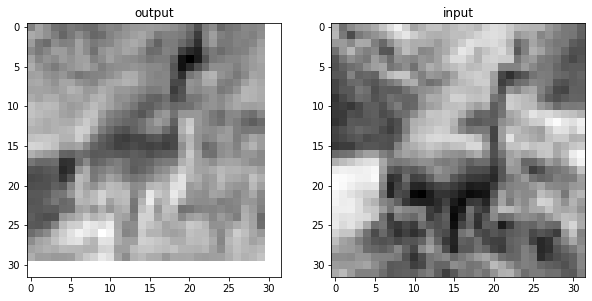

In [3]:
#output image with different "filters"
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)   # bookskip
plt.title('output')   # bookskip
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap='gray')  # bookskip
plt.title('input')  # bookskip
plt.savefig('Ch8_F2_PyTorch.png')  # bookskip
plt.show()

In [4]:
#define convolution later
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1) # <1>
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))

In [5]:
with torch.no_grad():
    conv.bias.zero_()
    
with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

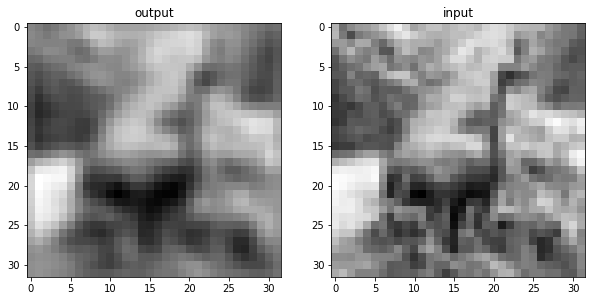

In [6]:
output = conv(img.unsqueeze(0))
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)   # bookskip
plt.title('output')   # bookskip
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap='gray')  # bookskip
plt.title('input')  # bookskip
plt.savefig('Ch8_F4_PyTorch.png')  # bookskip
plt.show()

In [7]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0]])
    conv.bias.zero_()

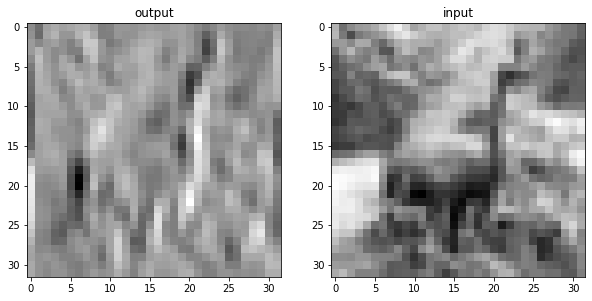

In [8]:
output = conv(img.unsqueeze(0))
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)   # bookskip
plt.title('output')   # bookskip
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap='gray')  # bookskip
plt.title('input')  # bookskip
plt.savefig('Ch8_F5_PyTorch.png')  # bookskip
plt.show()

In [9]:
pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))

img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

In [10]:
#define a nn sequential model with different layers (just example not used)
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            # ...
            )

In [11]:
#define a nn sequential model with different layers (just example not used)
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            # ... <1>
            nn.Linear(8 * 8 * 8, 32),
            nn.Tanh(),
            nn.Linear(32, 2))

In [12]:
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [13]:
#define Net as the nn module used 
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.conv3 = nn.Conv2d(16, 8, kernel_size=3, padding=1) #part 2, comment out for part 1
        self.pool3 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 10)
#frward pass for training the model
    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(x)))
        out = self.pool3(self.act3(self.conv3(out)))#part 2, comment out for part 1
        out = out.view(-1, 8 * 8 * 8) # <1>
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out
model = Net()


In [14]:
model = Net()

numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(19514, [432, 16, 1152, 8, 1152, 8, 16384, 32, 320, 10])

In [15]:
import torch.nn.functional as F
#define Net as the nn module used 
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 32, kernel_size=3, padding=1)#part 2, comment out for part 1
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 10)
        
#forward pass for training the model      
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = F.max_pool2d(torch.tanh(self.conv3(out)), 2)#part 2, comment out for part 1
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [16]:
model = Net()
model(img.unsqueeze(0))

tensor([[ 0.1487, -0.1006,  0.0701,  0.0019, -0.1129,  0.1378, -0.0671,  0.0077,
         -0.1341,  0.0243]], grad_fn=<AddmmBackward0>)

In [18]:
import datetime  # <1>
#training loop definition
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):  # <2>
        loss_train = 0.0
        for imgs, labels in train_loader:  # <3>
            
            outputs = model(imgs)  # <4>
            
            loss = loss_fn(outputs, labels)  # <5>

            optimizer.zero_grad()  # <6>
            
            loss.backward()  # <7>
            
            optimizer.step()  # <8>

            loss_train += loss.item()  # <9>

        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))  # <10>

In [19]:
 
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64,
                                           shuffle=True)  # <1>
 #define the model 
model = Net()  #  <2>
optimizer = optim.SGD(model.parameters(), lr=1e-2)  #  <3>
loss_fn = nn.CrossEntropyLoss()  #  <4>
 #Training loop to run on the model 
training_loop(  # <5>
    n_epochs = 3,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
 
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64,
                                         shuffle=False)
 #validation definition with an analysis of accuracy for the model
def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0
 
        with torch.no_grad():  # <1>
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1) # <2>
                total += labels.shape[0]  # <3>
                correct += int((predicted == labels).sum())  # <4>
 
        print("Accuracy {}: {:.2f}".format(name , correct / total))
 #print validation
validate(model, train_loader, val_loader)
             

2022-03-31 00:18:51.143895 Epoch 1, Training loss 1.0487888470576827
Accuracy train: 0.79
Accuracy val: 0.81


In [20]:
device = (torch.device('cuda') if torch.cuda.is_available()
          else torch.device('cpu'))
print(f"Training on device {device}.")

Training on device cpu.


In [21]:
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64,
                                         shuffle=False)
all_acc_dict = collections.OrderedDict()


In [22]:
import datetime
#Define the trianing loop used by the Res10 Model 
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)  # <1>
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train += loss.item()

        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))

In [23]:
#Res10 Block
class ResBlock(nn.Module):
    def __init__(self, n_chans):
        super(ResBlock, self).__init__()
        self.conv = nn.Conv2d(n_chans, n_chans, kernel_size=3,
                              padding=1, bias=False)  # <1>
        self.batch_norm = nn.BatchNorm2d(num_features=n_chans)
        torch.nn.init.kaiming_normal_(self.conv.weight,
                                      nonlinearity='relu')  # <2>
        torch.nn.init.constant_(self.batch_norm.weight, 0.5)
        torch.nn.init.zeros_(self.batch_norm.bias)

    def forward(self, x):
        out = self.conv(x)
        out = self.batch_norm(out)
        out = torch.relu(out)
        return out + x

In [28]:
#Res10 Model 
class Res10(nn.Module):
    def __init__(self, n_chans1=16, n_blocks=10):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.resblocks = nn.Sequential(
            *(n_blocks * [ResBlock(n_chans=n_chans1)]))
        self.fc1 = nn.Linear(8 * 8 * n_chans1, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = self.resblocks(out)
        out = F.max_pool2d(out, 2)
        out = out.view(-1, 8 * 8 * self.n_chans1)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [30]:
model = Res10(n_chans1=32, n_blocks=10).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=3e-3)
loss_fn = nn.CrossEntropyLoss()
#training loop for the Res10 model 
training_loop(
    n_epochs = 300,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
#print accuracy of Res10 Model
all_acc_dict["baseline"] = validate(model, train_loader, val_loader)


2022-03-31 00:36:03.410246 Epoch 1, Training loss 0.4819026188865589
2022-03-31 00:43:51.809554 Epoch 10, Training loss 0.24233815448868806
Accuracy train: 0.89
Accuracy val: 0.86


In [31]:
#define training loop for loop that has weight decay factored into it
def training_loop_l2reg(n_epochs, optimizer, model, loss_fn,
                        train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            l2_lambda = 0.001
            l2_norm = sum(p.pow(2.0).sum()
                          for p in model.parameters())  # <1>
            loss = loss + l2_lambda * l2_norm

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))

In [32]:
model = Res10().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()
#training loop for Res10 using a training loop that utilizes weight decay
training_loop_l2reg(
    n_epochs = 300,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["l2 reg"] = validate(model, train_loader, val_loader)

2022-03-31 00:44:37.099314 Epoch 1, Training loss 0.5488201495568463
2022-03-31 00:47:50.022528 Epoch 10, Training loss 0.2918118998218494
2022-03-31 00:51:25.058385 Epoch 20, Training loss 0.20687167047505167
2022-03-31 00:54:56.740276 Epoch 30, Training loss 0.19395285612268812
2022-03-31 00:58:25.441140 Epoch 40, Training loss 0.21281606794162922
2022-03-31 01:01:55.133659 Epoch 50, Training loss 0.07576616445354595
2022-03-31 01:05:22.360686 Epoch 60, Training loss 0.06356628170343721
2022-03-31 01:08:51.207484 Epoch 70, Training loss 0.0589458174101866
2022-03-31 01:12:21.201672 Epoch 80, Training loss 0.055691909566996205
2022-03-31 01:15:51.660886 Epoch 90, Training loss 0.052920935687365805
2022-03-31 01:19:17.072318 Epoch 100, Training loss 0.050430315362799696
2022-03-31 01:22:43.812104 Epoch 110, Training loss 0.04812808825996271
2022-03-31 01:26:12.100902 Epoch 120, Training loss 0.04598340954465471
2022-03-31 01:29:39.027213 Epoch 130, Training loss 0.0439801936981025
2022

In [33]:
#Res10 model that utilizes a dropout function within the model
lass Res10(nn.Module):
    def __init__(self, n_chans1=32, n_blocks=10):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv1_dropout = nn.Dropout2d(p=0.3)
        self.resblocks = nn.Sequential(
            *(n_blocks * [ResBlock(n_chans=n_chans1)]))
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.conv2_dropout = nn.Dropout2d(p=0.3)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = self.conv1_dropout(out)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = self.conv2_dropout(out)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [34]:
model = Res10(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

#training loop for Res10 model with dropout function 
training_loop(
    n_epochs = 300,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["dropout"] = validate(model, train_loader, val_loader)

2022-03-31 02:27:27.526918 Epoch 1, Training loss 0.5396672688472043
2022-03-31 02:28:51.272464 Epoch 10, Training loss 0.3673182686043393
2022-03-31 02:30:24.663154 Epoch 20, Training loss 0.33112090114195636
2022-03-31 02:31:57.303220 Epoch 30, Training loss 0.30735219094403987
2022-03-31 02:33:29.629906 Epoch 40, Training loss 0.2898724427458587
2022-03-31 02:35:01.714433 Epoch 50, Training loss 0.27051135717303887
2022-03-31 02:36:35.755464 Epoch 60, Training loss 0.2615134852707006
2022-03-31 02:38:07.670279 Epoch 70, Training loss 0.2471734699170301
2022-03-31 02:39:38.265150 Epoch 80, Training loss 0.23049439276289788
2022-03-31 02:41:07.383607 Epoch 90, Training loss 0.21982835076606957
2022-03-31 02:42:36.981610 Epoch 100, Training loss 0.20889631374056933
2022-03-31 02:44:05.986775 Epoch 110, Training loss 0.1972650309467012
2022-03-31 02:45:35.255286 Epoch 120, Training loss 0.1903580781191018
2022-03-31 02:47:05.914537 Epoch 130, Training loss 0.17613023903909003
2022-03-31

In [35]:
#Model defined to use Res10 with batch normalization
class Res10BatchNorm(nn.Module):
    def __init__(self, n_chans1=32, n_blocks=10):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv1_batchnorm = nn.BatchNorm2d(num_features=n_chans1)
        self.resblocks = nn.Sequential(
            *(n_blocks * [ResBlock(n_chans=n_chans1)]))
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3, 
                               padding=1)
        self.conv2_batchnorm = nn.BatchNorm2d(num_features=n_chans1 // 2)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = self.conv1_batchnorm(self.conv1(x))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = self.conv2_batchnorm(self.conv2(out))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [36]:
model = Res10BatchNorm(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()
#training loop for the Res10 model that utilizes batch normalization
training_loop(
    n_epochs = 300,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["batch_norm"] = validate(model, train_loader, val_loader)

2022-03-31 03:12:34.625815 Epoch 1, Training loss 0.4540349269748493
2022-03-31 03:14:17.068016 Epoch 10, Training loss 0.2682789916730231
2022-03-31 03:16:10.542700 Epoch 20, Training loss 0.21056518380998807
2022-03-31 03:18:03.576515 Epoch 30, Training loss 0.16306047072740876
2022-03-31 03:19:57.964214 Epoch 40, Training loss 0.12141295299408542
2022-03-31 03:21:52.039663 Epoch 50, Training loss 0.0847946636402493
2022-03-31 03:23:44.923419 Epoch 60, Training loss 0.06186309054636272
2022-03-31 03:25:37.545389 Epoch 70, Training loss 0.04549520150728666
2022-03-31 03:27:30.853223 Epoch 80, Training loss 0.03603569077695631
2022-03-31 03:29:23.756045 Epoch 90, Training loss 0.015809819784466248
2022-03-31 03:31:15.353444 Epoch 100, Training loss 0.010231241230870698
2022-03-31 03:33:08.174180 Epoch 110, Training loss 0.006981905084103346
2022-03-31 03:35:02.210846 Epoch 120, Training loss 0.004994255549920972
2022-03-31 03:36:55.068953 Epoch 130, Training loss 0.003751708451913563
2